In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
df=pd.read_excel("/content/drive/MyDrive/tp_ai/production/production.xlsx")
df.head()

,date,Cumulative_solar_power,kWh electricity/day,Gas/day
0,2011-10-26,0.1,15.1,9.0
1,2011-10-27,10.2,7.4,9.2
2,2011-10-28,20.2,5.8,8.0
3,2011-10-29,29.6,4.9,6.6
4,2011-10-30,34.2,11.7,5.3


In [13]:
def load_data(data, seq_len, column_index ):
    x = []
    y = []
    for i in range(seq_len, len(data)):
        x.append(data.iloc[i-seq_len : i, 2:3])
        y.append(data.iloc[i, 2:3])
    return np.array(x), np.array(y)



In [18]:
# Predict 'kWh electricity/day'
training_size = int(len(df)*0.8)
x, y = load_data(df, 20, 2)

x_train = x[:training_size]
y_train = y[:training_size]
x_test = x[training_size:]
y_test = y[training_size:]

reg1 = LinearRegression().fit(x_train.reshape(x_train.shape[0], -1), y_train)
y_pred1 = reg1.predict(x_test.reshape(x_test.shape[0], -1))

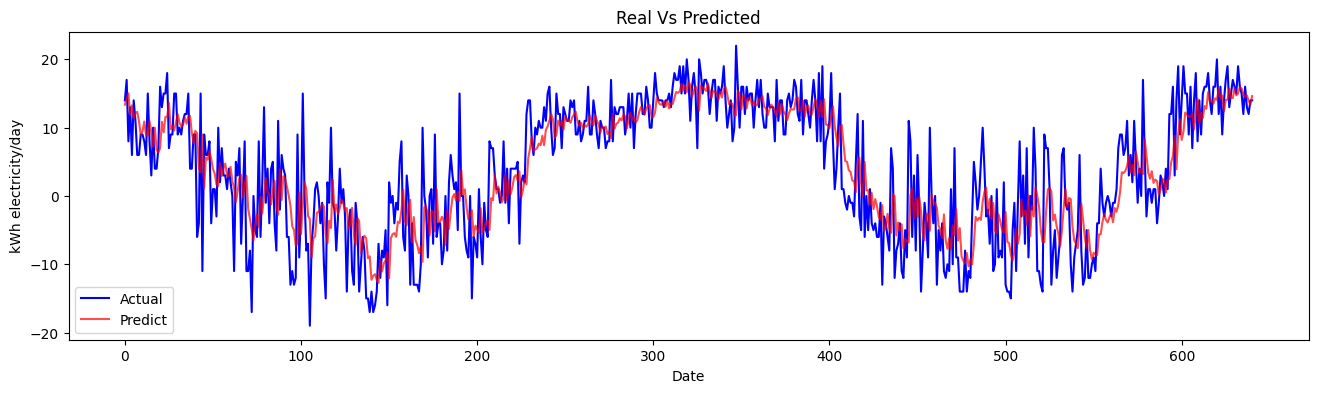

In [20]:
plt.figure(figsize=(16,4))
plt.plot(y_test, color='blue',label='Actual')
plt.plot(y_pred1, alpha=0.7, color='red',label='Predict')
plt.title('Real Vs Predicted')
plt.xlabel('Date')
plt.ylabel('kWh electricity/day')
plt.legend()
plt.show()



In [19]:
# Predict 'Gas/day'
x, y = load_data(df, 20, 3)

x_train = x[:training_size]
y_train = y[:training_size]
x_test = x[training_size:]
y_test = y[training_size:]

reg2 = LinearRegression().fit(x_train.reshape(x_train.shape[0], -1), y_train)
y_pred2 = reg2.predict(x_test.reshape(x_test.shape[0], -1))

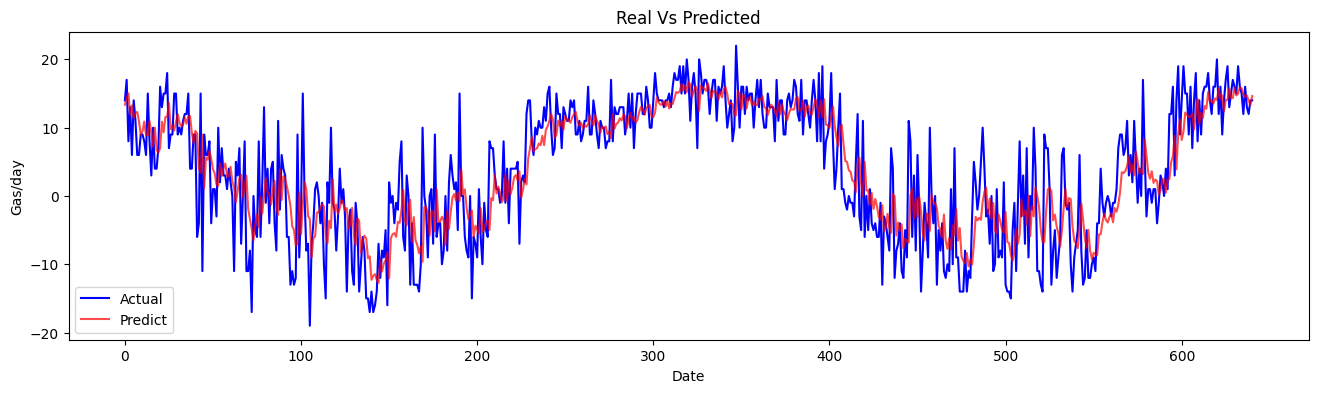

In [21]:
plt.figure(figsize=(16,4))
plt.plot(y_test, color='blue',label='Actual')
plt.plot(y_pred2, alpha=0.7, color='red',label='Predict')
plt.title('Real Vs Predicted')
plt.xlabel('Date')
plt.ylabel('Gas/day')
plt.legend()
plt.show()



In [24]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred1)).round(2)
# Exclude zero values
mask = y_test != 0
mape = np.round(np.mean(np.abs(y_test[mask]-y_pred1[mask])/y_test[mask])*100,2)

#mape = np.round(np.mean(np.abs(y_test-y_pred)/y_test)*100,2)

print('RMSE:', rmse)
print('MAPE:', mape)

RMSE: 5.66
MAPE: 7.12


In [25]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred2)).round(2)
# Exclude zero values
mask = y_test != 0
mape = np.round(np.mean(np.abs(y_test[mask]-y_pred2[mask])/y_test[mask])*100,2)

#mape = np.round(np.mean(np.abs(y_test-y_pred)/y_test)*100,2)

print('RMSE:', rmse)
print('MAPE:', mape)

RMSE: 5.66
MAPE: 7.12
